In [3]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [12]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. 
# Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = "D:/TELKOM PWT/Semester 3/Ifrastruktur & Platform Sains Data/Praktikum/IPSD-Assignment/Modul 4/"

In [13]:
# Load data
pelajar = pd.read_csv(path + "pelajar.csv" , usecols=["gender", "parental level of education", "lunch", "test preparation course", "math score", "reading score", "writing score" ])

# Display 5 data teratas
pelajar.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


In [14]:
# Mendapatkan informasi dari data
pelajar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [15]:
# Melakukan analisa deskriptif
pelajar.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
# Check missing value
pelajar.isna().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
# Cek duplicate
duplicate = pelajar[pelajar.duplicated()]
duplicate

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [18]:
# drop duplicate
pelajar.drop_duplicates(inplace=True)

In [19]:
# Cek ukuran data apakah duplicate sudah terhapus
pelajar.shape

(1000, 7)

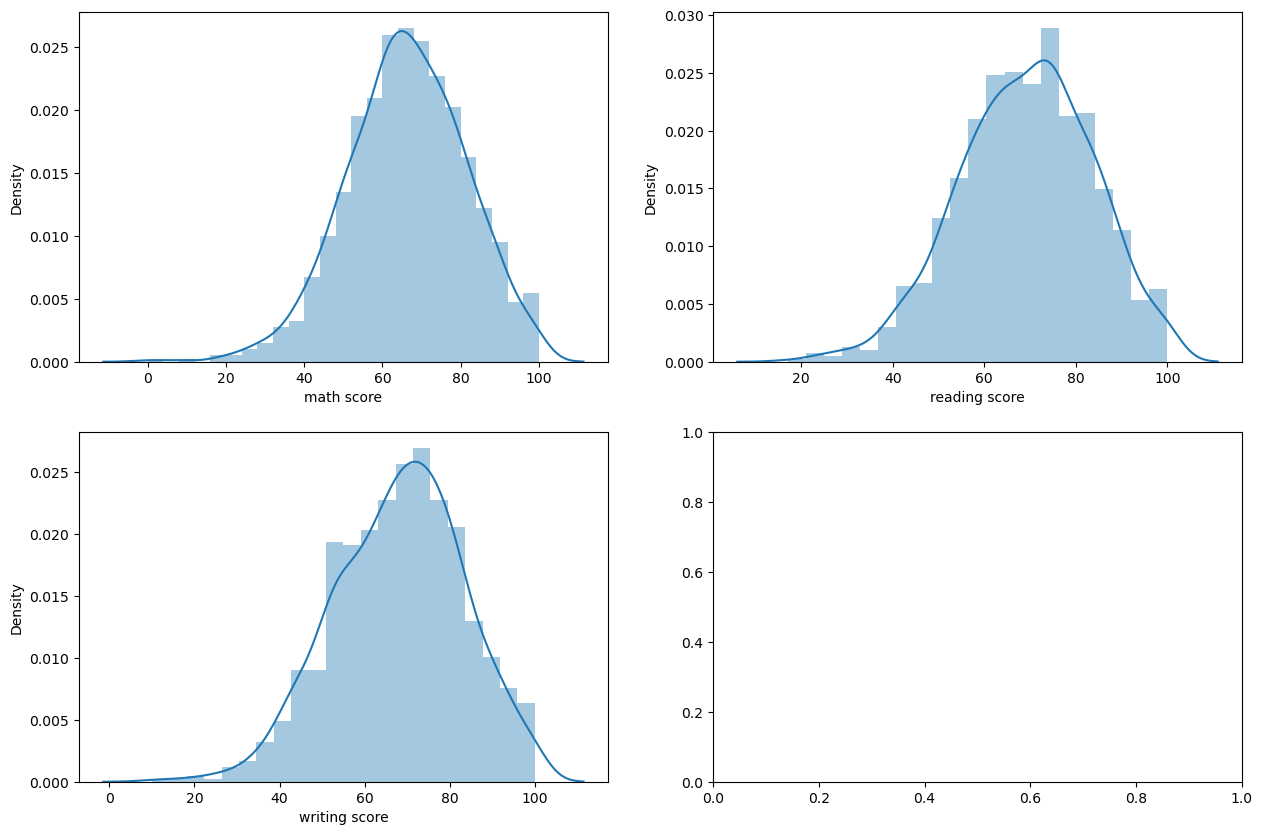

In [24]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(pelajar["math score"], ax=axes[0, 0])
sns.distplot(pelajar["reading score"], ax=axes[0, 1])
sns.distplot(pelajar["writing score"], ax=axes[1, 0])
plt.show()

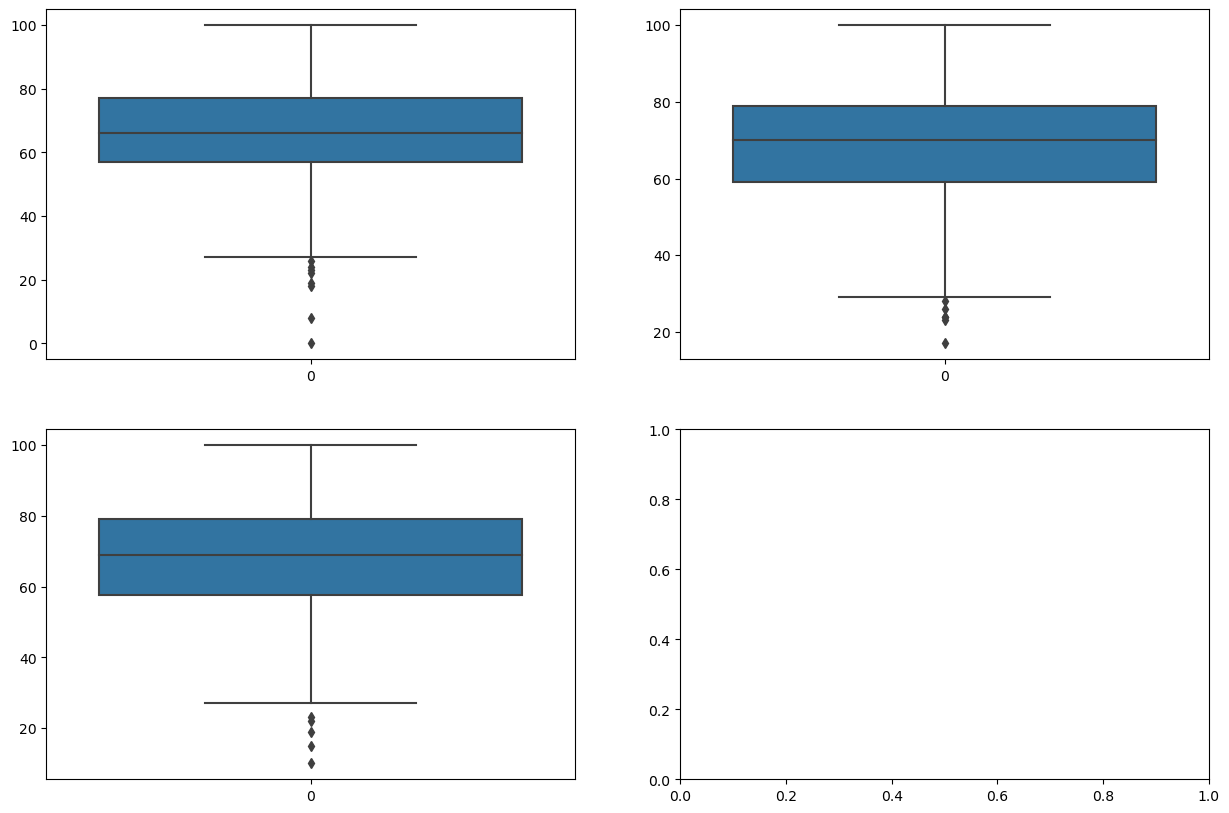

In [27]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(pelajar["math score"], ax=axes[0, 0])
sns.boxplot(pelajar["reading score"], ax=axes[0, 1])
sns.boxplot(pelajar["writing score"], ax=axes[1, 0])
plt.show()

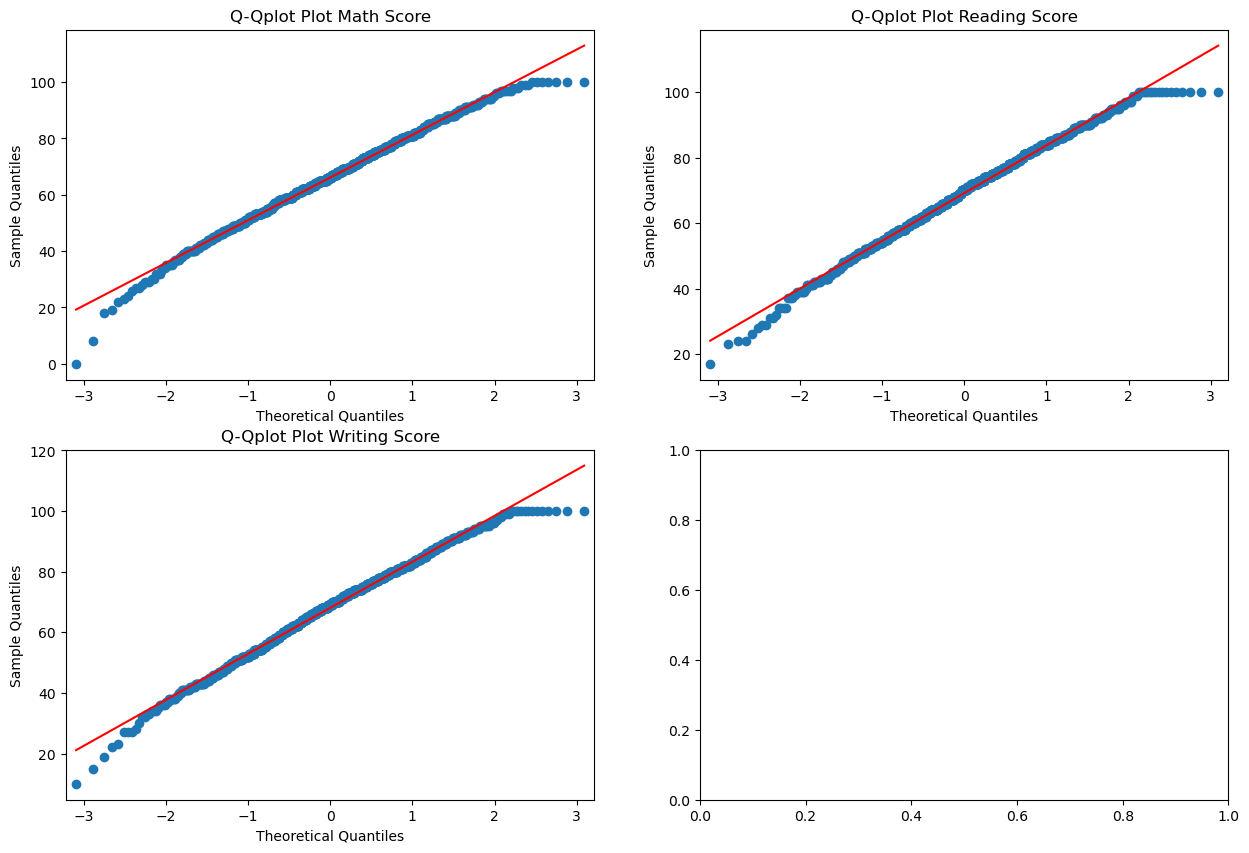

In [32]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(pelajar["math score"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot Math Score')

sm.graphics.qqplot(pelajar["reading score"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot Reading Score')

sm.graphics.qqplot(pelajar["writing score"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot Writing Score')

plt.show()

In [30]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = pelajar.select_dtypes(include=['number'])

for i in column:
  stat, p = shapiro(pelajar[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.993, p=0.000
Tolak H0, math score tidak berdistribusi normal
Statistics=0.993, p=0.000
Tolak H0, reading score tidak berdistribusi normal
Statistics=0.992, p=0.000
Tolak H0, writing score tidak berdistribusi normal


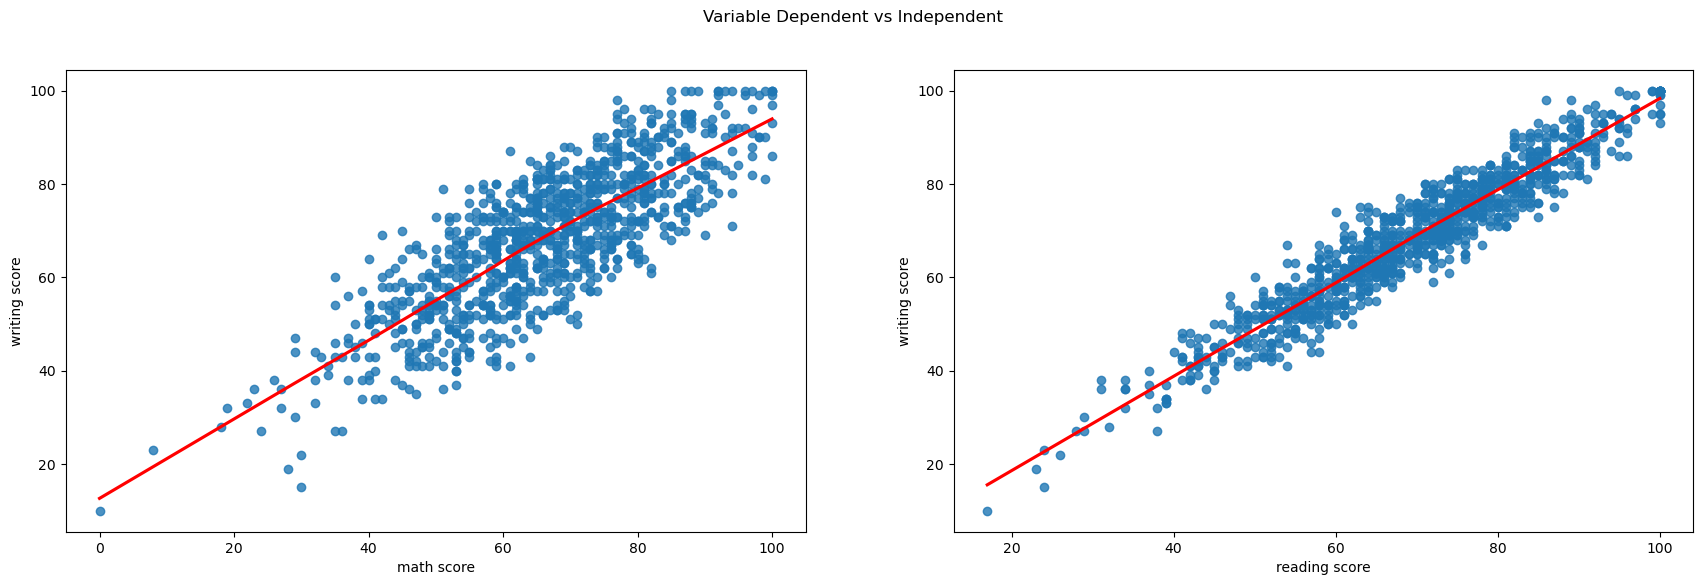

In [33]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 2, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=pelajar["math score"], y=pelajar["writing score"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=pelajar["reading score"], y=pelajar["writing score"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])

plt.show()

<Axes: >

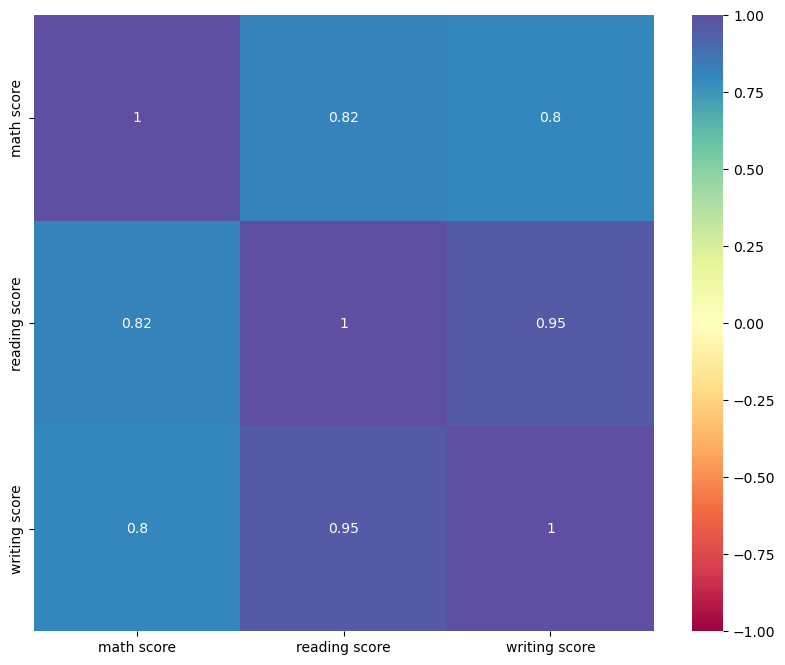

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(pelajar.select_dtypes(include=['number']).corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [37]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = pelajar.select_dtypes(include=['number']).corr()["writing score"].sort_values()
korelasi

math score       0.802642
reading score    0.954598
writing score    1.000000
Name: writing score, dtype: float64

In [45]:
# Scale data
scaler = StandardScaler()
scaled_pelajar = scaler.fit_transform(pelajar.select_dtypes(include=['number']))
scaled_pelajar

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

In [46]:
# Membuat dataframe dari hasil scalling
scaled_pelajar = pd.DataFrame(scaled_pelajar, columns=pelajar.select_dtypes(include=['number']).columns)
scaled_pelajar

,math score,reading score,writing score
0,0.390024,0.193999,0.391492
1,0.192076,1.427476,1.313269
2,1.577711,1.770109,1.642475
3,-1.259543,-0.833899,-1.583744
4,0.653954,0.605158,0.457333
...,...,...,...
995,1.445746,2.044215,1.774157
996,-0.269803,-0.970952,-0.859491
997,-0.467751,0.125472,-0.201079
998,0.126093,0.605158,0.589015


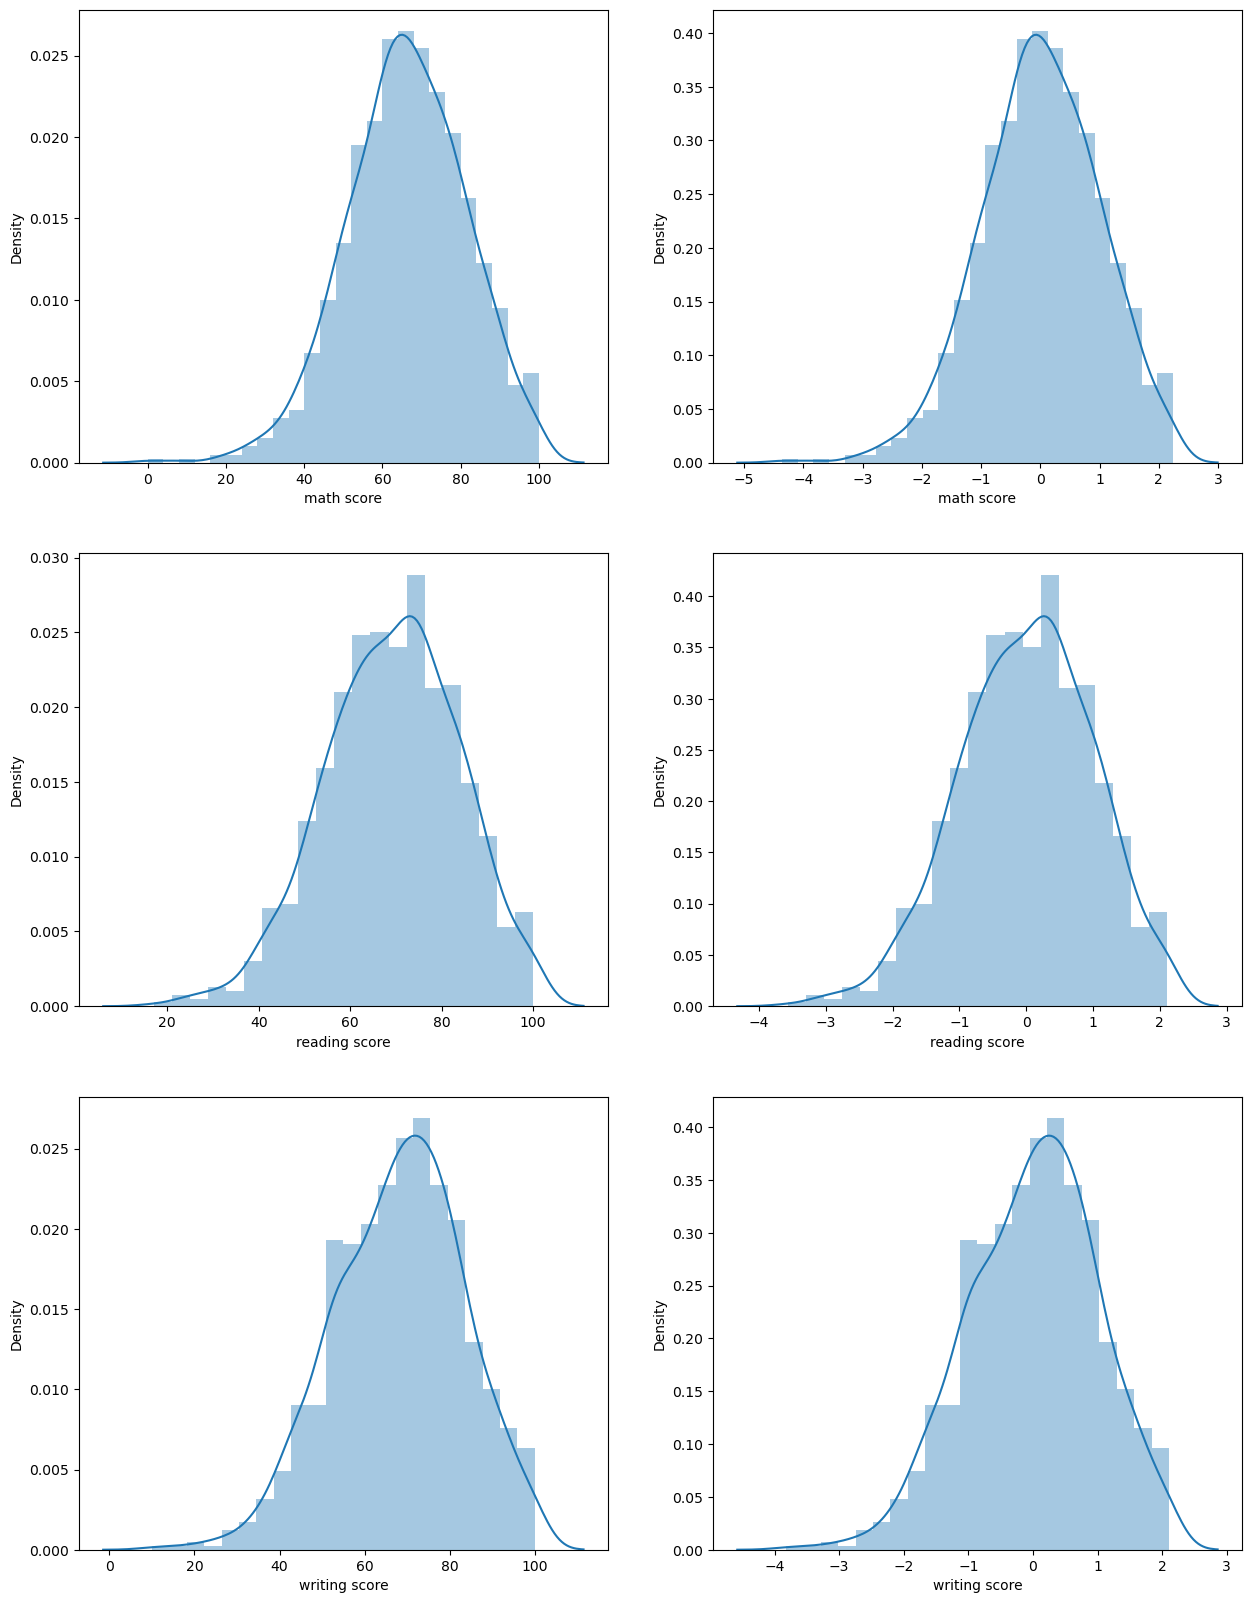

In [47]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

sns.distplot(pelajar["math score"], ax=axes[0, 0])
sns.distplot(scaled_pelajar["math score"], ax=axes[0, 1])
sns.distplot(pelajar["reading score"], ax=axes[1, 0])
sns.distplot(scaled_pelajar["reading score"], ax=axes[1, 1])
sns.distplot(pelajar["writing score"], ax=axes[2, 0])
sns.distplot(scaled_pelajar["writing score"], ax=axes[2, 1])

plt.show()

In [48]:
X = scaled_pelajar.drop("writing score", axis=1).values
y = scaled_pelajar["writing score"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  700
Ukuran X test  300
Ukuran y train  700
Ukuran y test  300


In [49]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [50]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [51]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     3477.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:27:19   Log-Likelihood:                -166.39
No. Observations:                 700   AIC:                             338.8
Df Residuals:                     697   BIC:                             352.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0079      0.012     -0.678      0.4

In [52]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.9088980443542792
adjusted coefficient of determination: 0.9086366327168454
regression coefficients: [-0.00788293  0.06914174  0.89791087]


In [57]:
# membuat list
list_columns = []

for i in pelajar.select_dtypes(include=['number']).columns:
  if i != "writing score":
    list_columns.append(i)

In [58]:
list_columns

['math score', 'reading score']

In [60]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_score"] = y_test
df_statsmod["prediction_score"] = prediction_1
df_statsmod.head()

,math score,reading score,actual_score,prediction_score
0,-0.269803,0.193999,0.391492,0.147656
1,1.379763,0.262525,0.259809,0.323240
2,-1.721422,-1.587691,-1.188697,-1.552510
3,0.719937,-0.491267,-0.266920,-0.399219
4,0.192076,0.605158,0.523174,0.548775


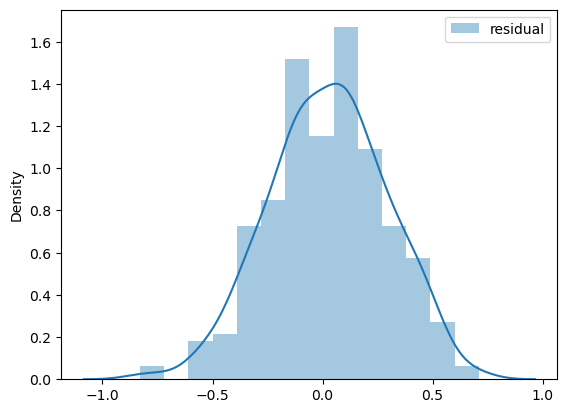

In [62]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_score'] - df_statsmod['prediction_score']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [63]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.997, p=0.789
Gagal Tolak H0, residual berdistribusi normal


In [64]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,math score,reading score,actual_score,prediction_score,residual
0,-0.269803,0.193999,0.391492,0.147656,0.243836
1,1.379763,0.262525,0.259809,0.323240,-0.063431
2,-1.721422,-1.587691,-1.188697,-1.552510,0.363813
3,0.719937,-0.491267,-0.266920,-0.399219,0.132299
4,0.192076,0.605158,0.523174,0.548775,-0.025601


<function matplotlib.pyplot.show(close=None, block=None)>

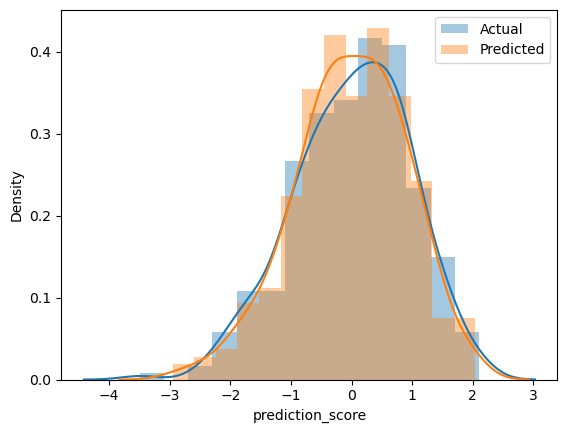

In [65]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_score'], label="Actual")
sns.distplot(df_statsmod['prediction_score'], label="Predicted")
plt.legend()
plt.show

In [66]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.8923476153102081

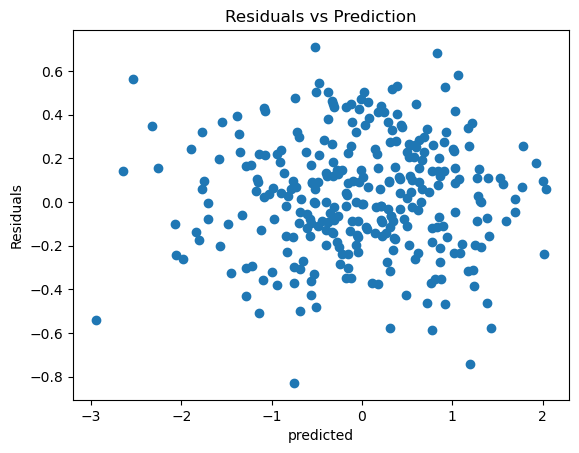

In [73]:
asm_homosk = plt.scatter(df_statsmod['prediction_score'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = plt.title('Residuals vs Prediction')

In [74]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_score'], df_statsmod['prediction_score']))

R-square : 0.9225636597777943


In [75]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_score'], df_statsmod['prediction_score']))

MSE : 0.07130637978227762


In [77]:
t_test_const, t_test_X1, t_test_X2 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)

T-test score const:  -0.6780995972591893
T-test score X1:  3.3834919587073995
T-test score X2:  43.381011988478086


In [78]:

p_value_const, p_value_X1, p_value_X2 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)

P-value const:  0.4979335944554011
P-value X1:  0.0007557450199132389
P-value X2:  3.3832943823895616e-200


In [79]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  3476.8844006955705
P-value :  0.0
Tolak H0
